<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/Fraud_Detection_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Anomaly Detection Techniques for Fraudulent Credit Card Transactions**

### [Problem Statement](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
> **Our current credit scoring systems often limit access to fair credit, especially for people with non-traditional income sources or limited credit histories. As a community, we aim to create an inclusive, transparent, and fair credit scoring model that reduces bias, considers diverse financial backgrounds, and opens doors to responsible credit for all. This will promote economic mobility and set a new standard for equitable lending practices.**


### **Our Goals**
**Given a person’s credit-related information, build a machine learning model that can classify the credit score.**

# **Environment Setup**

**Tools and Libraries Installation**

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Python Environment Configuration**

# **Importing Libraries**

**Essential Libraries for Data Analysis**

In [188]:
from sklearn.preprocessing import StandardScaler

**Libraries for Machine Learning and Visualization**

In [189]:
from imblearn.over_sampling import SMOTE

# **Loading Data**

**Loading the Kaggle Credit Card Fraud Dataset**

In [190]:
cfd = pd.read_csv('creditcard.csv')

# **Exploration of Data**

**Glimpse of the Dataset**

**Displaying the First Few Rows**

In [191]:
cfd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Dataset Information (Shape, Columns, Null Values, Data Types)**

In [192]:
print(f"Shape:  {cfd.shape}\n")
print(f"Columns:  {cfd.columns}\n")
print(f"Null Values:  \n{cfd.isnull().sum()}\n")
print(f"Data Types: \n{cfd.dtypes}")

Shape:  (284807, 31)

Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Values:  
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types: 
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64


**Summary Statistics for Numerical Features**

In [193]:
print(cfd.describe(include='all'))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

**Distribution of Independent Variable**

In [194]:
cfd['Class'].value_counts()

,count
Class,
0,284315
1,492


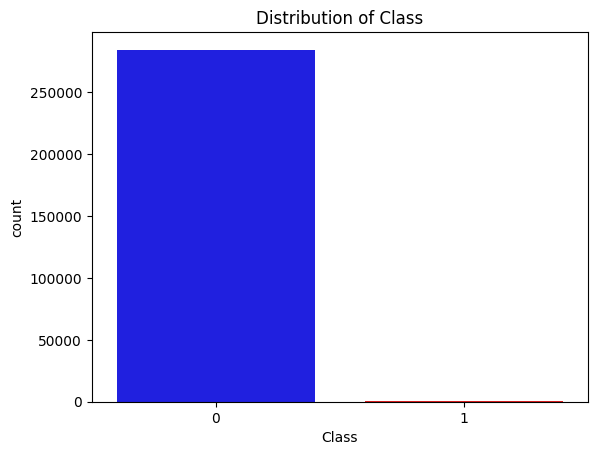

In [195]:
palette = ['blue', 'red']
sns.countplot(data=cfd, x='Class', hue='Class', palette=palette, legend=False)
plt.title('Distribution of Class')
plt.show()

**Distribution of Transaction Amount**

**Distribution of Time**

**Dataset Histogram**

**Histograms for Key Features (V1-V28, Amount, Time)**

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

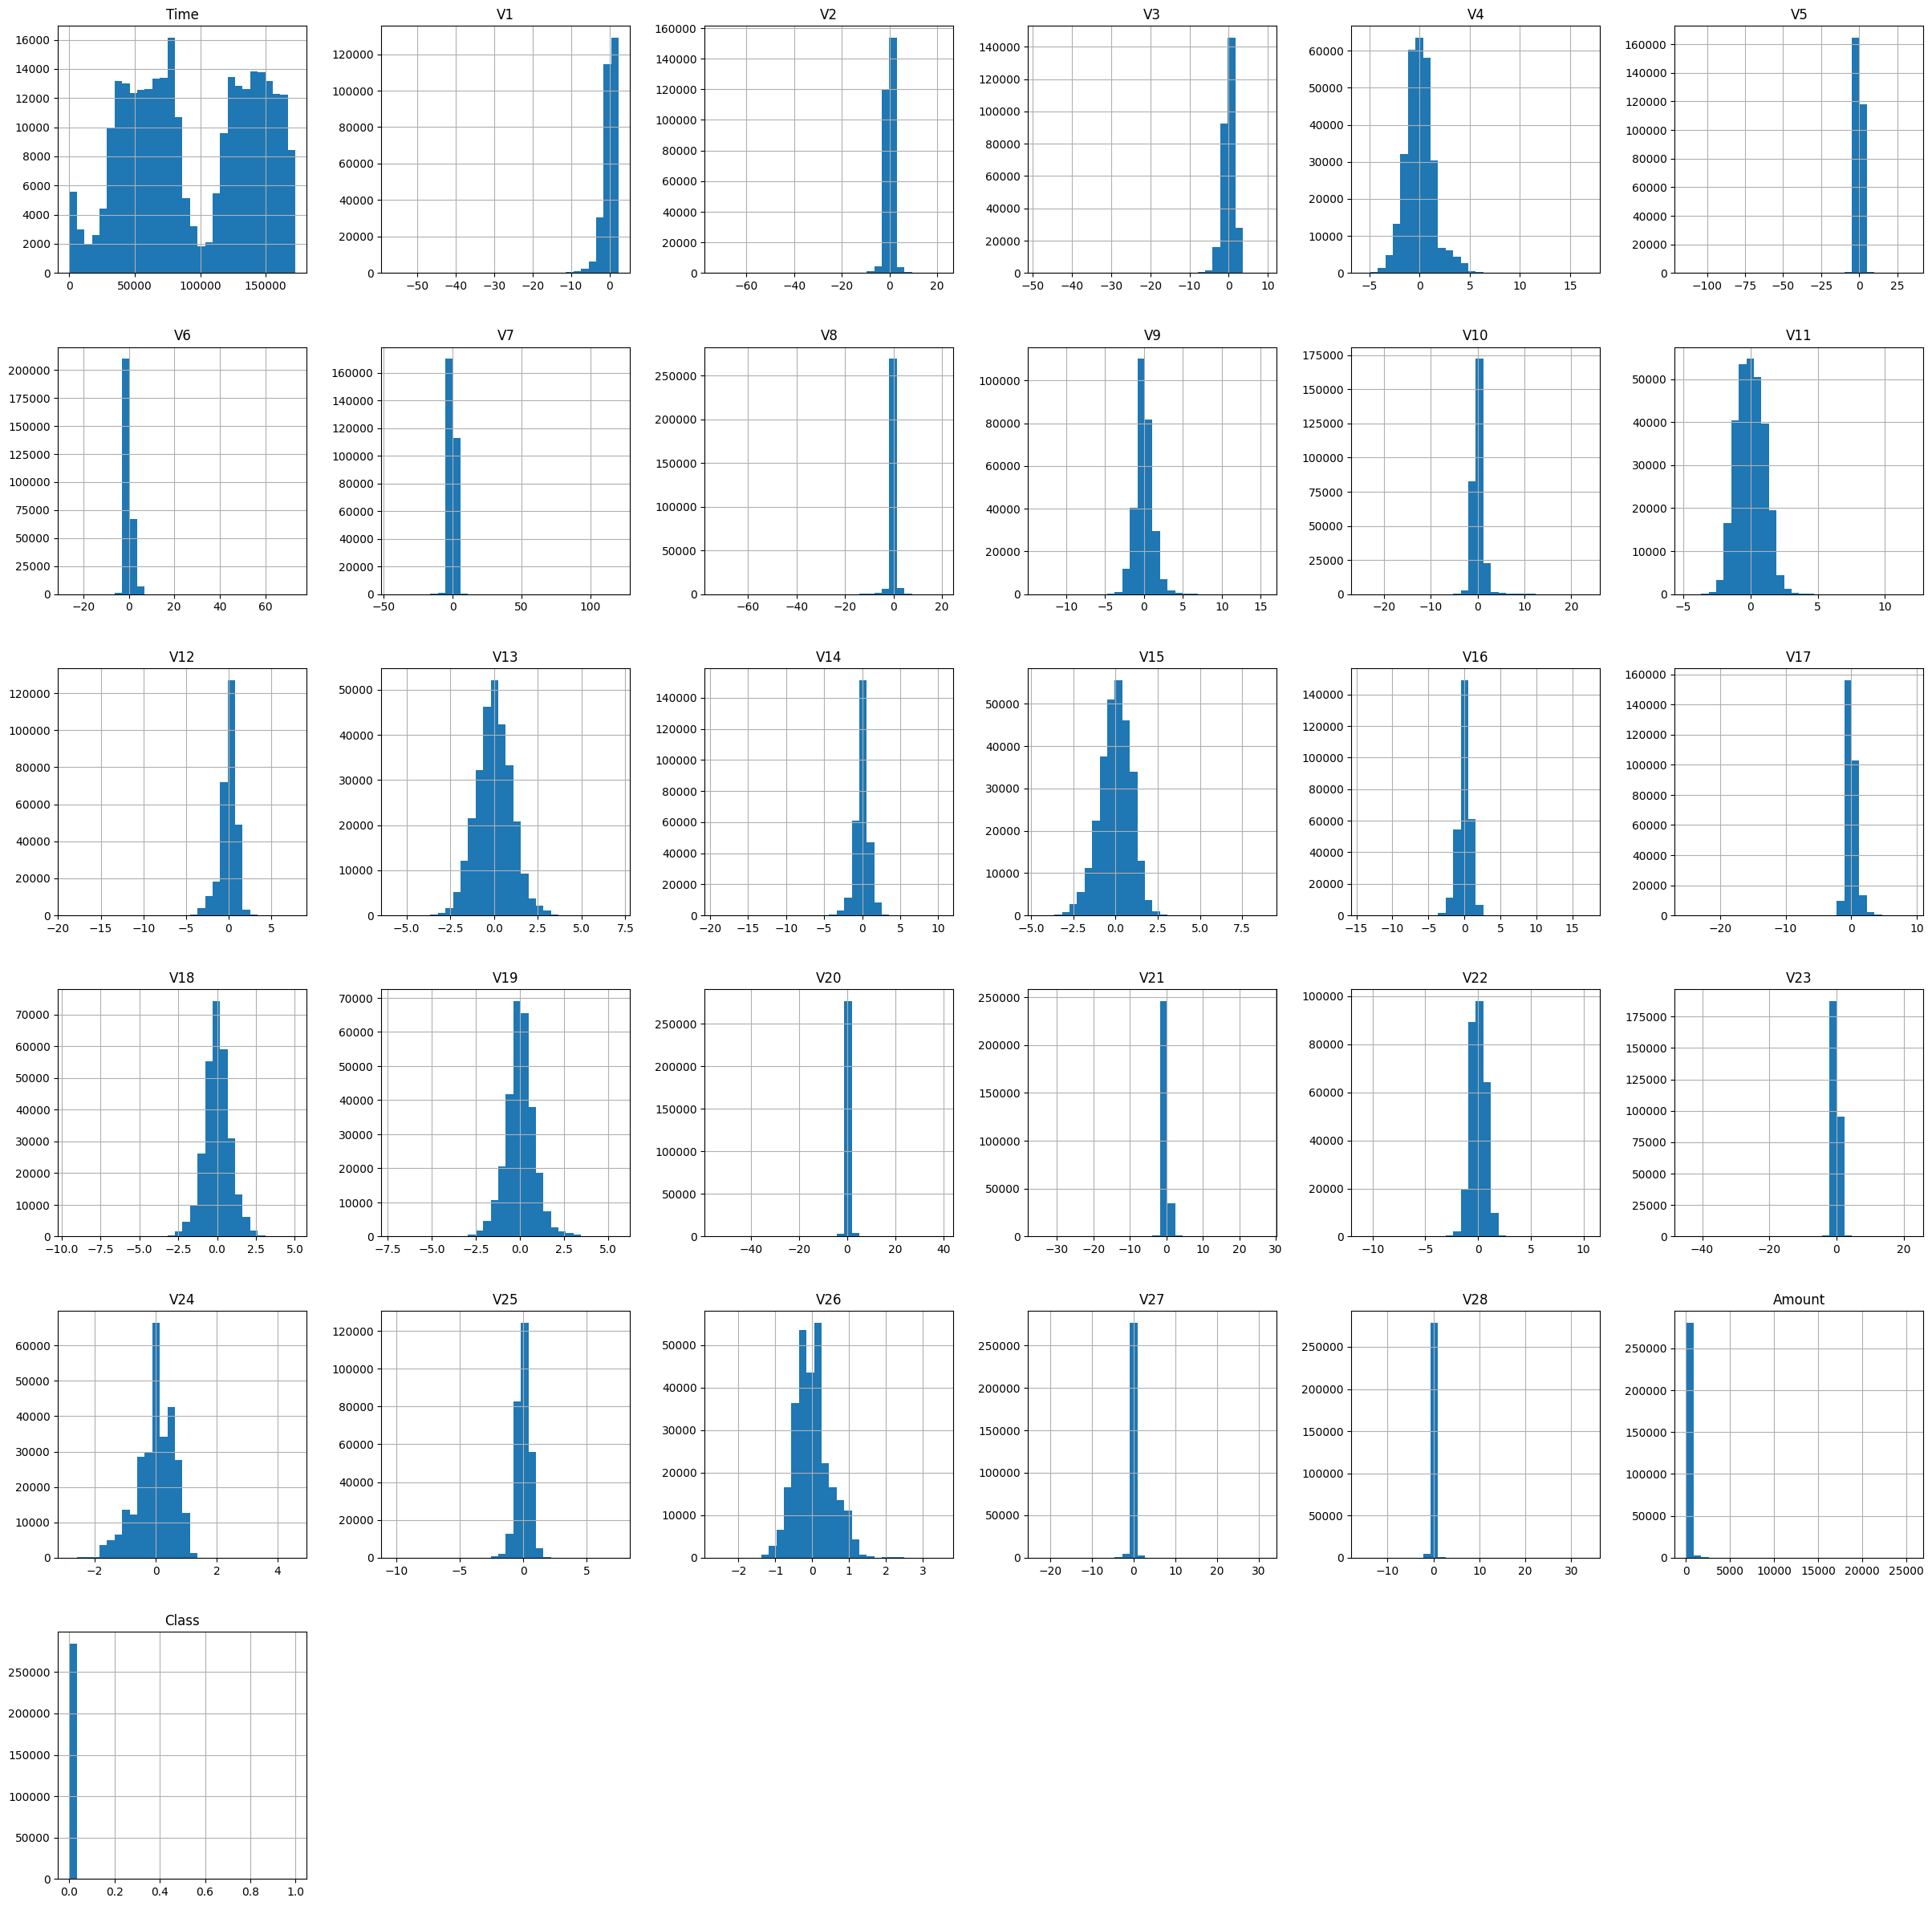

In [196]:
cfd.hist(bins=30, figsize=(30, 30))


# **Pre-processing of Data**

**Checking of Null Values**

In [197]:
cfd.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Checking of Outliers**

In [198]:
#Check outliers

**Checking of Duplicate Transactions**

In [199]:
cfd.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [200]:
duplicate_counts = cfd.duplicated().value_counts()
print(duplicate_counts)

False    283726
True       1081
Name: count, dtype: int64


In [201]:
duplicate_counts = cfd.duplicated().value_counts()
print("Duplicate Counts before removal:\n", duplicate_counts)

cfd = cfd.drop_duplicates(keep='first')

duplicate_counts = cfd.duplicated().value_counts()
print("\nDuplicate Counts after removal:\n", duplicate_counts)

Duplicate Counts before removal:
 False    283726
True       1081
Name: count, dtype: int64

Duplicate Counts after removal:
 False    283726
Name: count, dtype: int64


**Correlation Analysis**

**Correlation Matrix for Numerical Features**

In [202]:
correlation_matrix = cfd.corr()

**Heatmap Visualization**

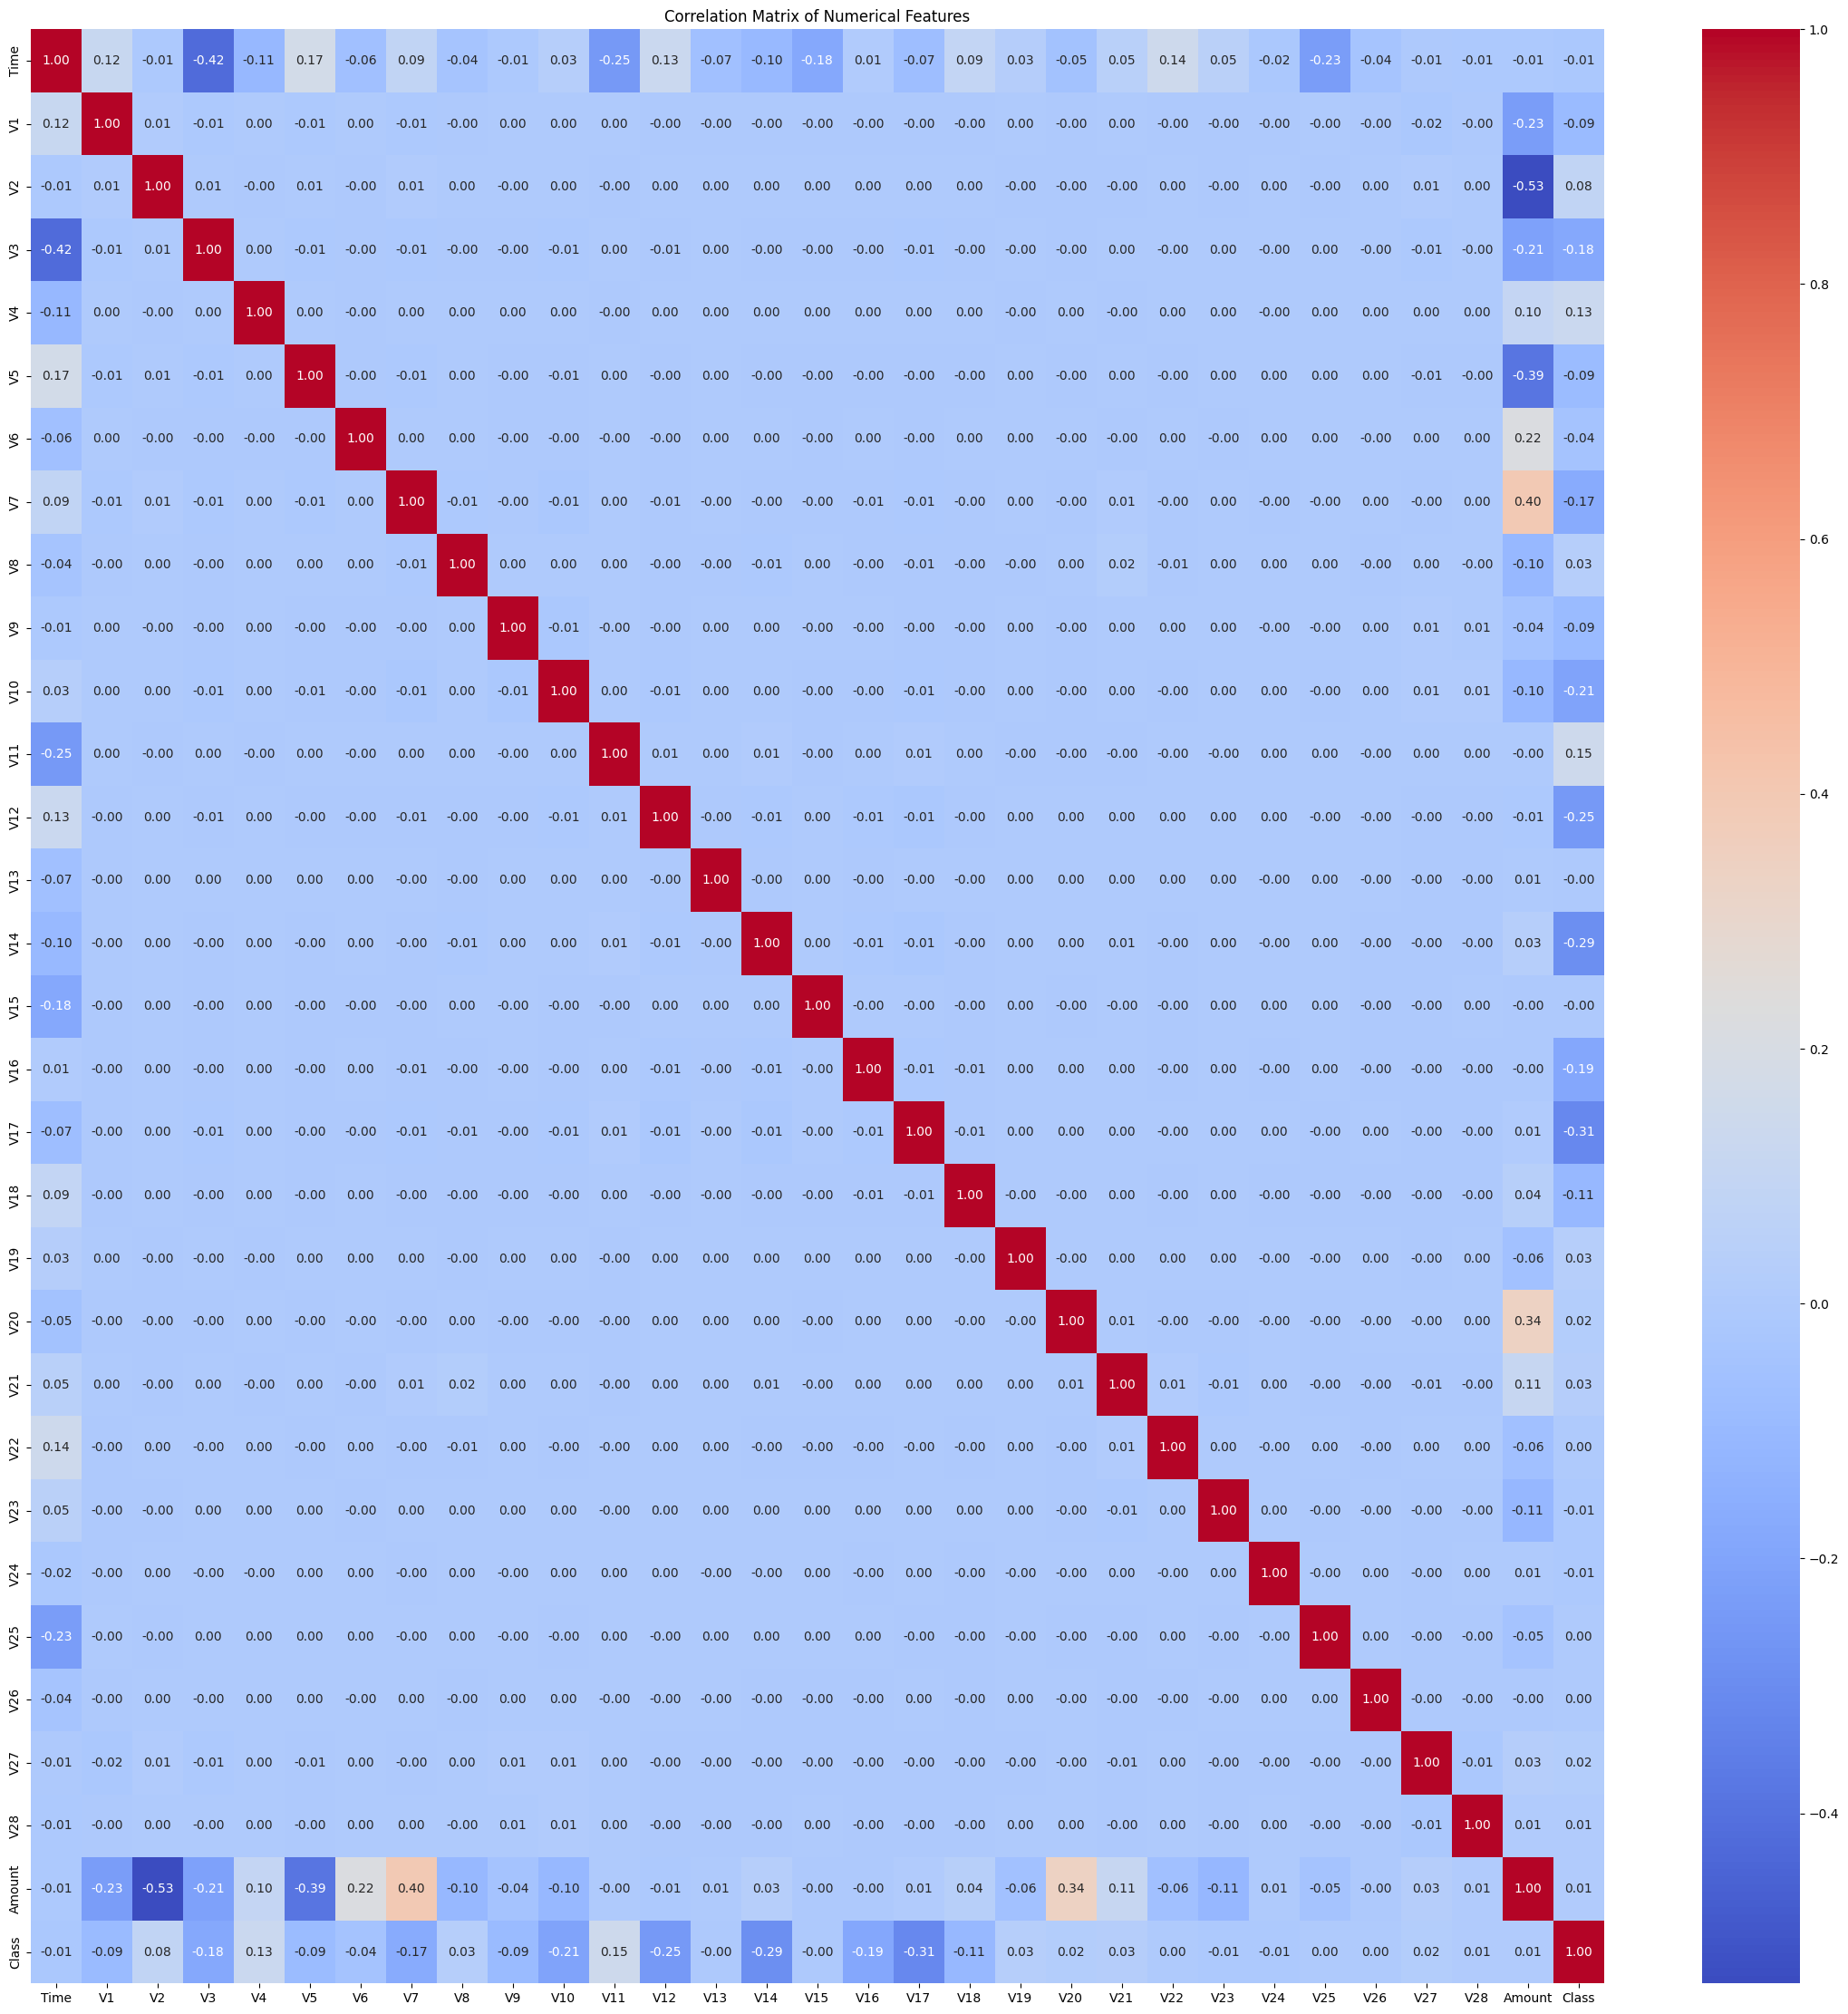

In [203]:
plt.figure(figsize=(28, 28))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Application of Standard Scaler**

**Feature Scaling**

<Axes: >

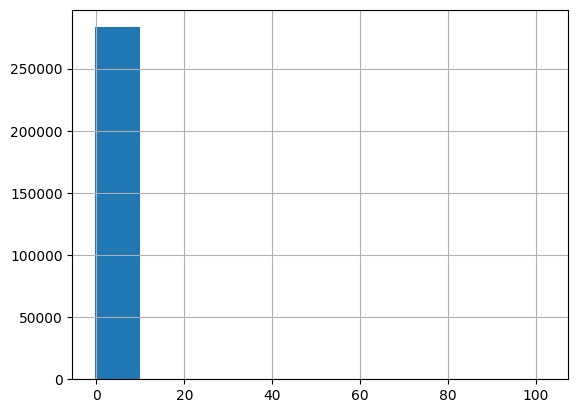

In [204]:
new_df = cfd.copy()
new_df['Amount'] = StandardScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

In [205]:
new_df['Amount'].describe()

,Amount
count,2.837260e+05
mean,-5.409347e-17
std,1.000002e+00
min,-3.533268e-01
25%,-3.309625e-01
50%,-2.654671e-01
75%,-4.378088e-02
max,1.022476e+02


In [206]:
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df
#Time values are now between 0 and 1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


**Sampling of New Dataframe**

In [207]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33560,0.215768,-1.071719,-4.343904,-0.497727,-0.277591,-2.482346,-0.472073,0.991747,-0.414207,1.694252,...,0.856441,0.013647,-1.183439,0.536058,0.064148,-0.016945,-0.179133,0.236036,4.506916,0
57869,0.278456,1.314915,-0.980378,-0.032665,-2.770975,-1.047365,-0.705180,-0.491240,-0.076395,0.571959,...,-0.416346,-0.481886,-0.009117,0.009622,0.555844,-0.836622,0.099256,0.014826,-0.248255,0
187479,0.738194,-1.680526,-0.959150,-1.329705,-1.028361,-0.730922,0.253124,3.308312,-0.480062,0.157630,...,-0.084593,-0.204108,0.517400,-0.611013,-0.445912,-0.409744,0.231809,0.253554,2.365973,0
243555,0.879526,2.114488,0.169976,-2.051966,0.070326,0.481642,-1.819440,0.886700,-0.673729,0.077960,...,0.163748,0.642597,-0.058720,0.128632,0.461792,0.234073,-0.082360,-0.075323,-0.301729,0
96229,0.380081,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,...,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,-0.237911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,0.183562,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,...,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,0.068200,0
118050,0.433643,1.069132,-0.159789,1.913486,2.811710,-0.690517,1.942449,-1.259828,0.577277,1.031453,...,0.046602,0.725405,-0.199566,-0.678442,0.552088,0.328766,0.118229,0.029660,-0.353327,0
73633,0.319552,-0.891311,0.808612,1.263076,0.522615,1.183978,0.905303,0.565347,0.186910,-1.042086,...,0.129436,0.443403,-0.327563,-1.315188,0.647441,-0.057036,-0.014691,0.038455,-0.281681,0
268346,0.944280,-0.358224,1.446564,-1.175105,0.075659,2.041475,-1.677117,1.568559,-0.415562,-1.073097,...,0.078727,0.333168,-0.350660,0.947248,0.196432,0.700004,0.079430,0.208233,-0.350292,0


# **Machine Learning**

**Train, Test, and Validation**

**Splitting the Dataset into Training and Testing Sets**

In [208]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239598
 1       402
 Name: count, dtype: int64,
 Class
 0    21970
 1       30
 Name: count, dtype: int64,
 Class
 0    21685
 1       41
 Name: count, dtype: int64)

In [209]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (21726, 31))

In [210]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (21726, 30), (21726,))

**Handling Data Imbalance**

**Understanding Class Imbalance**

**Stratified Sampling for Imbalanced Data**

**SMOTE - Synthetic Minority Oversampling Technique**

In [221]:
print("Before applying SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Before applying SMOTE, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After applying SMOTE, the shape of train_X: {}'.format(x_train_res.shape))
print('After applying SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After applying SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After applying SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before applying SMOTE, counts of label '1': 402
Before applying SMOTE, counts of label '0': 239598 

After applying SMOTE, the shape of train_X: (479196, 30)
After applying SMOTE, the shape of train_y: (479196,) 

After applying SMOTE, counts of label '1': 239598
After applying SMOTE, counts of label '0': 239598


**Algorithms - Unsupervised Anomaly Detection**

**Isolation Forest**

In [212]:
#Modelling
#Isolation Forest


In [213]:
#Model Evaluation
#Precision

#Recall

#F1-Score

#AUC-ROC

**Autoencoders**

In [214]:
#Autoencoders


In [215]:
#Model Evaluation
#Precision

#Recall

#F1-Score

#AUC-ROC

**Local Outlier Factor**

In [216]:
#Local Outlier Factor (LOF)


In [217]:
#Model Evaluation
#Precision

#Recall

#F1-Score

#AUC-ROC

# **Evaluation of Model Performance**

**Selection of Best Performing Model**

In [218]:
#Comparison of models, select the best-performing model

#Matplotlib and Seaborn

**Creation of Metrics-Data**

In [219]:
#Creation of metrics_data

#Create and display DataFrame

**Precision, Recall, F1-Score, and AUC-ROC**

**Confusion Matrix for Each Model**

**Comparison of Model Performance**

# **Detecting Fraud using V Score**

**Input Parameters**

**Defining Input Features (Time, Amount, V1-V28)**

**Preprocessing Input Data**

**Prediction through V-Score Input**

**Function for Fraud Prediction**

**Example Use Case with Input Parameters**